In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler


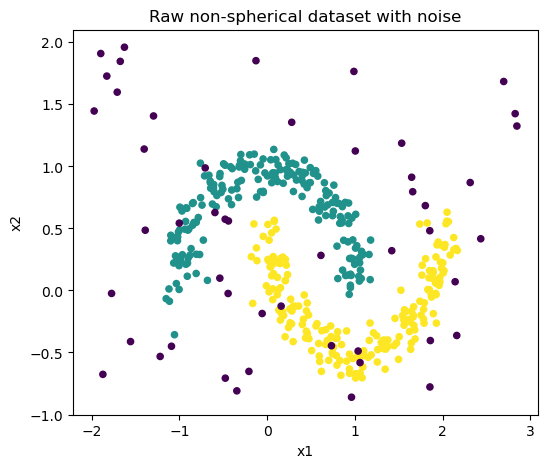

In [84]:
X, y = make_moons(n_samples=400, noise=0.1, random_state=42)

rng = np.random.RandomState(42)
n_noise = 50
noise_points = rng.uniform(low=[-2, -1], high=[3, 2], size=(n_noise, 2))

X_full = np.vstack([X, noise_points])
y_full = np.hstack([y, np.full(n_noise, -1)])

plt.figure(figsize=(6, 5))
plt.scatter(X_full[:, 0], X_full[:, 1], c=y_full, s=20)
plt.title("Raw non-spherical dataset with noise")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

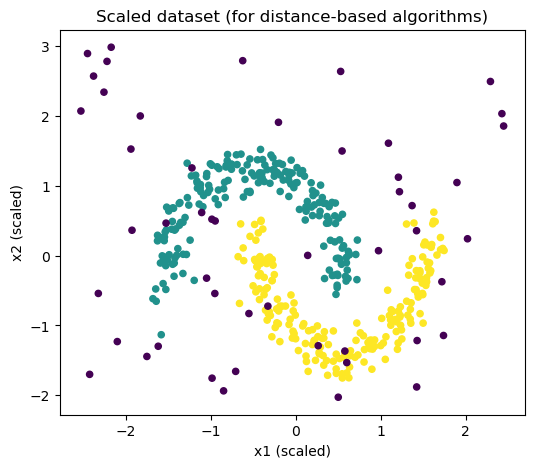

In [86]:
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_full, s=20)
plt.title("Scaled dataset (for distance-based algorithms)")
plt.xlabel("x1 (scaled)")
plt.ylabel("x2 (scaled)")
plt.show()

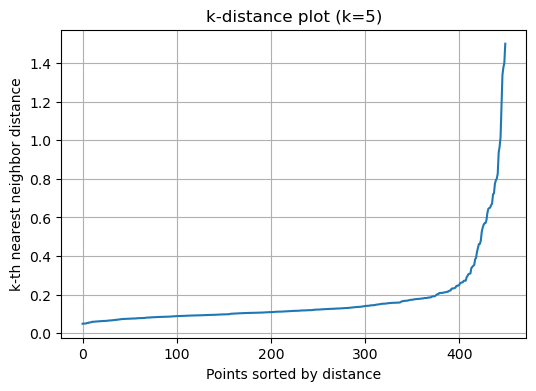

In [87]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

k = 5  
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)

distances, indices = nbrs.kneighbors(X_scaled)

k_distances = np.sort(distances[:, -1])

plt.figure(figsize=(6,4))
plt.plot(k_distances)
plt.title("k-distance plot (k=5)")
plt.xlabel("Points sorted by distance")
plt.ylabel("k-th nearest neighbor distance")
plt.grid(True)
plt.show()


اگر داده Scale نشده باشد

این روش اشتباه نتیجه می‌دهد ❌

Setting 1: eps=0.15, min_samples=5
  Number of clusters: 8
  Number of noise points: 78
----------------------------------------


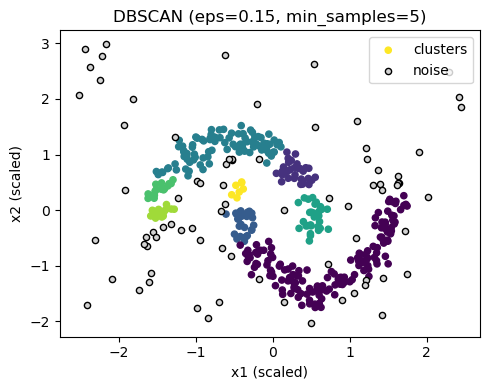

Setting 2: eps=0.25, min_samples=5
  Number of clusters: 2
  Number of noise points: 37
----------------------------------------


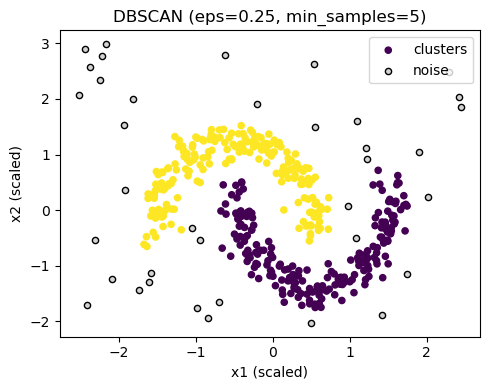

Setting 3: eps=0.5, min_samples=5
  Number of clusters: 2
  Number of noise points: 20
----------------------------------------


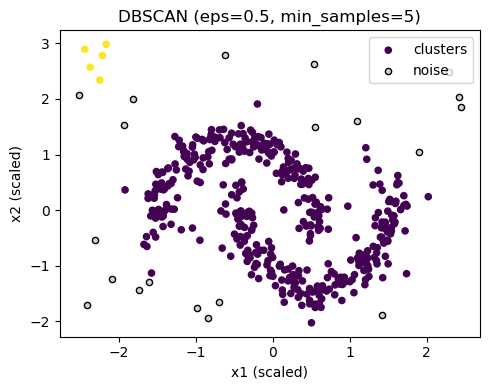

Setting 4: eps=0.25, min_samples=15
  Number of clusters: 5
  Number of noise points: 66
----------------------------------------


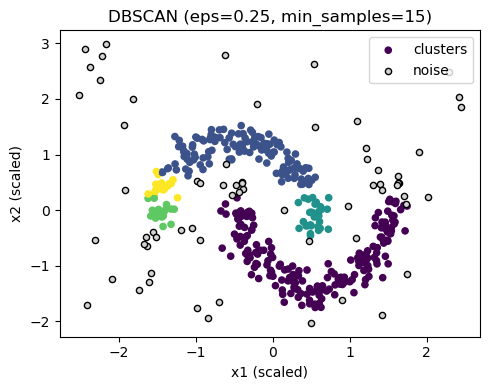

In [88]:
from sklearn.cluster import DBSCAN



param_list = [
    {"eps": 0.15, "min_samples": 5},   
    {"eps": 0.25, "min_samples": 5},  
    {"eps": 0.50, "min_samples": 5},   
    {"eps": 0.25, "min_samples": 15},  
]

for i, params in enumerate(param_list, start=1):
    eps = params["eps"]
    min_samples = params["min_samples"]

    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)

  
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    n_noise = np.sum(labels == -1)

    print(f"Setting {i}: eps={eps}, min_samples={min_samples}")
    print(f"  Number of clusters: {n_clusters}")
    print(f"  Number of noise points: {n_noise}")
    print("-" * 40)

    plt.figure(figsize=(5, 4))

   
    mask_noise = labels == -1
    mask_cluster = ~mask_noise

    
  
    plt.scatter(
        X_scaled[mask_cluster, 0],
        X_scaled[mask_cluster, 1],
        c=labels[mask_cluster],
        cmap="viridis",
        s=20,
        label="clusters",
    )

  
    plt.scatter(
        X_scaled[mask_noise, 0],
        X_scaled[mask_noise, 1],
        c="lightgray",
        s=20,
        label="noise",
        edgecolors="k",
    )

    plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
    plt.xlabel("x1 (scaled)")
    plt.ylabel("x2 (scaled)")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    




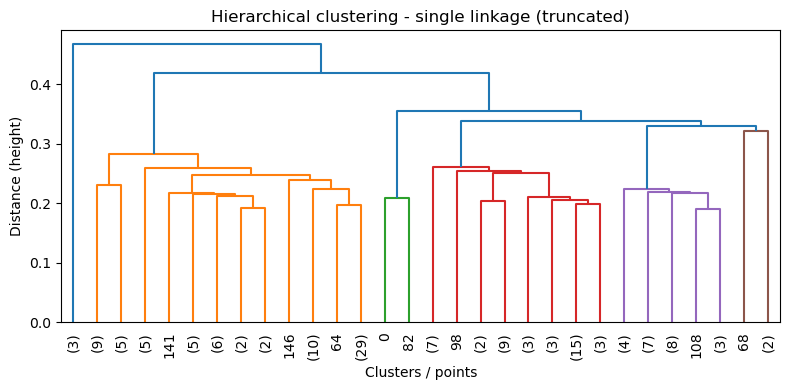

Cut at distance single=0.60  -->  number of clusters = 1
Cut at distance single=1.00  -->  number of clusters = 1
Cut for maxclust(single)=2  -->  number of clusters = 2
Cut for maxclust(single)=3  -->  number of clusters = 3
Cut for maxclust(single)=5  -->  number of clusters = 5


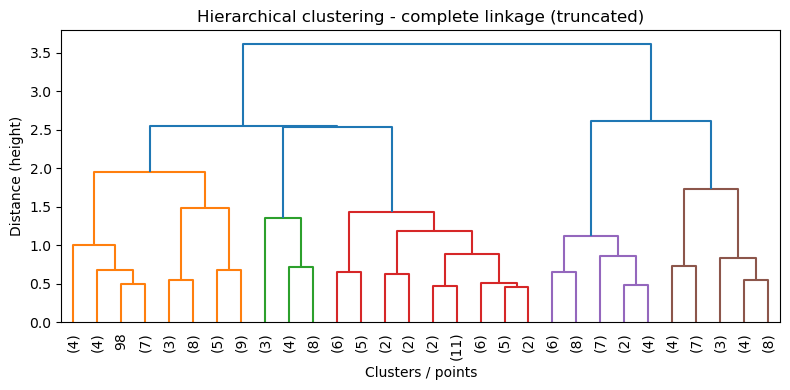

Cut at distance complete=0.60  -->  number of clusters = 23
Cut at distance complete=1.00  -->  number of clusters = 13
Cut for maxclust=2  -->  number of clusters = 2
Cut for maxclust=3  -->  number of clusters = 3
Cut for maxclust=5  -->  number of clusters = 5


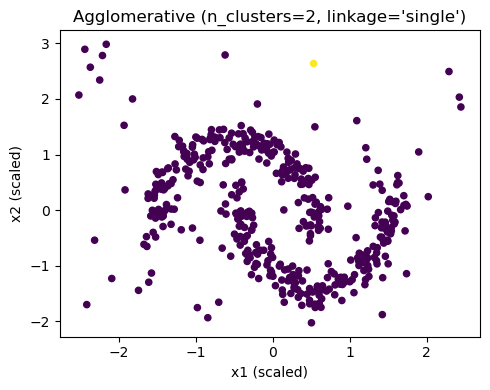

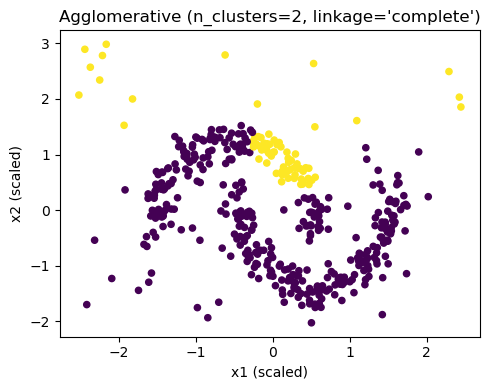

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

X_sub = X_scaled[:150]


Z_single   = linkage(X_sub, method="single")
Z_complete = linkage(X_sub, method="complete")



plt.figure(figsize=(8, 4))
dendrogram(Z_single, truncate_mode="lastp", p=30, leaf_rotation=90)
plt.title("Hierarchical clustering - single linkage (truncated)")
plt.xlabel("Clusters / points")
plt.ylabel("Distance (height)")
plt.tight_layout()
plt.show()


for dist in [0.6, 1.0]:
    labels_dist = fcluster(Z_single, t=dist, criterion="distance")
    n_clusters_dist = len(np.unique(labels_dist))
    print(f"Cut at distance single={dist:.2f}  -->  number of clusters = {n_clusters_dist}")

for k in [2, 3, 5]:
    labels_k = fcluster(Z_single, t=k, criterion="maxclust")
    n_clusters_k = len(np.unique(labels_k))
    print(f"Cut for maxclust(single)={k}  -->  number of clusters = {n_clusters_k}")   





plt.figure(figsize=(8, 4))
dendrogram(Z_complete, truncate_mode="lastp", p=30, leaf_rotation=90)
plt.title("Hierarchical clustering - complete linkage (truncated)")
plt.xlabel("Clusters / points")
plt.ylabel("Distance (height)")
plt.tight_layout()
plt.show()



for dist in [0.6, 1.0]:
    labels_dist = fcluster(Z_complete, t=dist, criterion="distance")
    n_clusters_dist = len(np.unique(labels_dist))
    print(f"Cut at distance complete={dist:.2f}  -->  number of clusters = {n_clusters_dist}")

for k in [2, 3, 5]:
    labels_k = fcluster(Z_complete, t=k, criterion="maxclust")
    n_clusters_k = len(np.unique(labels_k))
    print(f"Cut for maxclust={k}  -->  number of clusters = {n_clusters_k}")


model_single = AgglomerativeClustering(n_clusters=2, linkage="single")
model_complete = AgglomerativeClustering(n_clusters=2, linkage="complete")

labels_single = model_single.fit_predict(X_scaled)
labels_complete = model_complete.fit_predict(X_scaled)


plt.figure(figsize=(5, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_single, cmap="viridis", s=20)
plt.title("Agglomerative (n_clusters=2, linkage='single')")
plt.xlabel("x1 (scaled)")
plt.ylabel("x2 (scaled)")
plt.tight_layout()
plt.show()


plt.figure(figsize=(5, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_complete, cmap="viridis", s=20)
plt.title("Agglomerative (n_clusters=2, linkage='complete')")
plt.xlabel("x1 (scaled)")
plt.ylabel("x2 (scaled)")
plt.tight_layout()
plt.show()


در این تمرین، رفتار DBSCAN و Hierarchical Clustering (از نوع Agglomerative با linkageهای single و complete) را روی داده‌ای شامل دو خوشه‌ی هلالی و تعدادی نقاط نویزی مقایسه کردیم.

از نظر توانایی در شناسایی شکل‌های غیرکروی، DBSCAN عملکرد بسیار خوبی داشت. با تنظیمی مانند eps=0.25 و min_samples=5، الگوریتم دقیقاً دو خوشه‌ی اصلی هلالی را شناسایی کرد و تنها تعداد محدودی نقطه را به عنوان نویز برچسب‌گذاری نمود. علت این رفتار آن است که DBSCAN بر پایه‌ی چگالی کار می‌کند و فرض می‌کند که خوشه‌ها نواحی پرتراکم در فضا هستند که با نواحی کم‌چگال از هم جدا شده‌اند؛ بنابراین، شکل هندسی خوشه‌ها (کروی یا غیرکروی) برای آن مهم نیست و دو هلال را به خوبی به‌عنوان دو ناحیه‌ی پرتراکم مستقل تشخیص می‌دهد.

در مقابل، Hierarchical Clustering با linkage = complete نیز می‌تواند در صورت انتخاب مناسب ارتفاع برش یا تعداد خوشه (مثلاً maxclust=2) دو خوشه‌ی اصلی را جدا کند، اما تصمیم‌گیری آن بر پایه‌ی فاصله‌ی بین خوشه‌ها است (حداکثر فاصله بین نقاط دو خوشه) و نه مستقیماً چگالی. در linkage = single، به دلیل تعریف فاصله بر اساس نزدیک‌ترین نقاط، پدیده‌ی chain effect رخ می‌دهد و امکان دارد دو هلال از طریق یک زنجیره‌ی نقاط به یکدیگر متصل شوند و شکل خوشه‌ها کشیده و نامنظم شود.

از نظر شناسایی نویز، DBSCAN نسبت به Hierarchical برتری واضحی دارد. در DBSCAN، نقاطی که در هیچ ناحیه‌ی پرتراکم قرار نمی‌گیرند، به طور صریح با برچسب -1 به عنوان نویز علامت زده می‌شوند و می‌توان تعداد نویزها را مستقیماً گزارش کرد (برای مثال در تنظیم‌های مختلف، بین حدود ۲۰ تا ۷۸ نقطه به‌عنوان نویز تشخیص داده شد). در Hierarchical Clustering همه‌ی نقاط در ساختار سلسله‌مراتبی ادغام می‌شوند و مفهوم “نویز” به‌طور صریح وجود ندارد؛ مگر آنکه کاربر خودش با توجه به ارتفاع برش و خوشه‌های بسیار کوچک، برخی نقاط را به صورت دستی به عنوان outlier تفسیر کند.

به طور خلاصه، DBSCAN بر فرض «وجود خوشه‌های چگال و نواحی کم‌چگال بین آن‌ها» تکیه می‌کند و برای داده‌های دارای شکل‌های غیرکروی و حضور نویز گزینه‌ی مناسبی است. در حالی که Hierarchical Clustering بر نحوه‌ی تعریف فاصله بین خوشه‌ها (single، complete و …) تکیه دارد و بیشتر ابزاری برای مشاهده‌ی ساختار سلسله‌مراتبی داده و کمک به انتخاب تعداد خوشه از طریق دندروگرام است، اما در مواجهه با نویز و خوشه‌های غیرکروی به اندازه‌ی DBSCAN تخصصی عمل نمی‌کند.

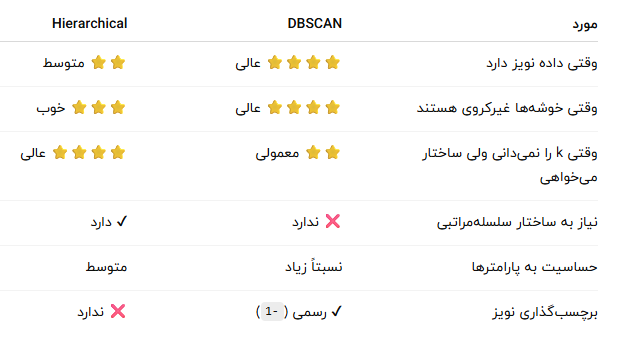